## Simple Linear Regression  Delivery Time

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as ply
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
org= pd.read_csv("D:\Excelr\Assignments\Simple Linear Regression\delivery_time.csv")
df= org.copy()

In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [5]:
df.shape

(21, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:>

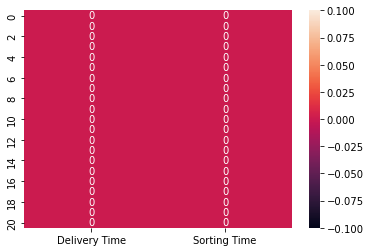

In [11]:
sns.heatmap(df.isnull(),annot=True)

C:\Users\ppran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sorting Time'>

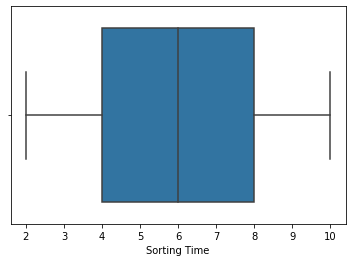

In [12]:
sns.boxplot(df["Sorting Time"])

<AxesSubplot:>

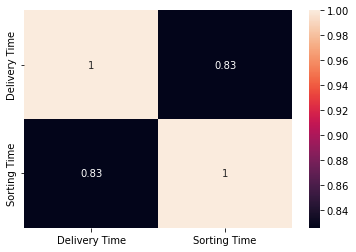

In [13]:
sns.heatmap(df.corr(),annot=True)

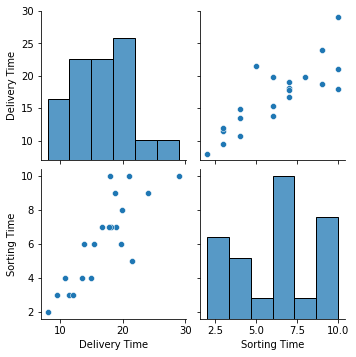

In [14]:
sns.pairplot(df)

In [15]:
df.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [16]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## Log Transformation

In [17]:
df["Sorting Time"]=np.log(df["Sorting Time"])
df["Delivery Time"]=np.log(df["Delivery Time"])
df

,Delivery Time,Sorting Time
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


In [18]:
x=df["Sorting Time"]
y=df["Delivery Time"]

In [19]:
x

0     2.302585
1     1.386294
2     1.791759
3     2.197225
4     2.302585
5     1.791759
6     1.945910
7     1.098612
8     2.302585
9     2.197225
10    2.079442
11    1.386294
12    1.945910
13    1.098612
14    1.098612
15    1.386294
16    1.791759
17    1.945910
18    0.693147
19    1.945910
20    1.609438
Name: Sorting Time, dtype: float64

In [20]:
y

0     3.044522
1     2.602690
2     2.983153
3     3.178054
4     3.367296
5     2.731115
6     2.944439
7     2.251292
8     2.884801
9     2.931194
10    2.987196
11    2.374906
12    2.814210
13    2.442347
14    2.487404
15    2.700018
16    2.621039
17    2.896464
18    2.079442
19    2.880882
20    3.068053
Name: Delivery Time, dtype: float64

In [21]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x=sc.fit_transform(pd.DataFrame(x))

In [22]:
model=smf.ols("y~x",data=df).fit()

In [23]:
model.params

Intercept    2.774787
x            0.272889
dtype: float64

In [24]:
model.tvalues , model.pvalues

(Intercept    81.594545
 x             8.024484
 dtype: float64,
 Intercept    1.181004e-25
 x            1.601539e-07
 dtype: float64)

In [25]:
model.rsquared , model.rsquared_adj

(0.7721613492687401, 0.760169841335516)